# **심장건강과 환자 변수 데이터분석을 통한 심장마비 위험 예측**


## *<2주차 과정>* 

### 라이브러리 불러오기

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/d/iamsouravbanerjee/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv
/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

### 라벨 인코딩 
- 일부 열의 데이터 타입이 숫자가 아닌 object(문자형)으로 저장되어 있어 범주형 데이터 변환을 해야 한다.
- blood pressure은 최고치와 최저치로 분리하여 두 개의 숫자형 열로 변환하기.

In [4]:
# Blood Pressure 열 최고치/최저치 분리 함수
def split_blood_pressure(bp):
    if isinstance(bp, str):  # 문자열로 저장된 경우만 처리
        try:
            systolic, diastolic = map(int, bp.split('/'))  # '/' 기준으로 분리
            return systolic, diastolic
        except ValueError:
            return None, None  # 잘못된 형식 처리
    return None, None

# 최고치와 최저치를 저장할 열 추가
df['Systolic_BP'], df['Diastolic_BP'] = zip(*df['Blood Pressure'].map(split_blood_pressure))

# 기존 Blood Pressure 열 제거
df.drop('Blood Pressure', axis=1, inplace=True)

In [5]:
# 잘 적용됐나 확인
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [6]:
## int, obj, float형 다시 나눠서 선언
int_var = df[['Age','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Previous Heart Problems','Medication Use','Stress Level','Income','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day','Heart Attack Risk','Systolic_BP','Diastolic_BP' ]]
obj_var = df[['Patient ID','Sex','Diet','Country','Continent','Hemisphere' ]]
float_var =[['Exercise Hours Per Week','Sedentary Hours Per Day','BMI']]

### 데이터 인코딩
- 범주형데이터에 숫자 라벨링하기

In [7]:

# 범주형 데이터 인코딩 (Label Encoding 사용)
for col in ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']:
    df[col] = df[col].astype('category').cat.codes

### float 값 반올림하기

- 잘못 코딩할 경우를 대비해, 원본 남겨놓기

In [8]:
# float_var 리스트형식으로 선언
float_var = ['Exercise Hours Per Week', 'Sedentary Hours Per Day', 'BMI']

# 원본 데이터를 별도로 저장
original_df = df[float_var].copy()

# 1의 자리까지 반올림 (정수 부분에서 반올림)
df[float_var] = df[float_var].round().astype(int)  # 반올림 후 정수형으로 변환

print(df.head())  # df 전체를 출력하면 반올림된 값 확인 가능


  Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    1          208          72         0               0   
1    CZE1114   21    1          389          98         1               1   
2    BNI9906   21    0          324          72         1               0   
3    JLN3497   84    1          383          73         1               1   
4    GFO8847   66    1          318          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...  BMI  Triglycerides  \
0        1        0                    0  ...   31            286   
1        1        1                    1  ...   27            235   
2        0        0                    0  ...   28            587   
3        1        0                    1  ...   36            378   
4        1        1                    0  ...   22            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Country  Continent  \
0                                0         

In [9]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,BMW7812,67,1,208,72,0,0,1,0,0,...,31,286,0,6,0,5,1,0,158,88
1,CZE1114,21,1,389,98,1,1,1,1,1,...,27,235,1,7,3,4,0,0,165,93
2,BNI9906,21,0,324,72,1,0,0,0,0,...,28,587,4,4,6,3,0,0,174,99
3,JLN3497,84,1,383,73,1,1,1,0,1,...,36,378,3,4,3,4,0,0,163,100
4,GFO8847,66,1,318,93,1,1,1,1,0,...,22,231,1,5,16,1,0,0,91,88


### **TASK 1. 데이터 전처리**

**결측치 확인**
- 없으면 문서화해주기

In [10]:
# 결측치 확인
missing_values = df.isnull().sum()
print("결측치 개수:\n", missing_values)

# 결측치 없음 -> 문서화
if missing_values.sum() == 0:
    print("결측치가 없습니다. 결측치 처리 단계를 생략합니다.")

결측치 개수:
 Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Systolic_BP                        0
Diastolic_BP                 

**이상치 처리**

In [11]:
# 숫자형 데이터 컬럼만 선택
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# 각 컬럼의 이상치 개수 확인
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 데이터 추출
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"'{column}' 컬럼의 이상치 개수: {len(outliers)}")


'Age' 컬럼의 이상치 개수: 0
'Cholesterol' 컬럼의 이상치 개수: 0
'Heart Rate' 컬럼의 이상치 개수: 0
'Diabetes' 컬럼의 이상치 개수: 0
'Family History' 컬럼의 이상치 개수: 0
'Smoking' 컬럼의 이상치 개수: 904
'Obesity' 컬럼의 이상치 개수: 0
'Alcohol Consumption' 컬럼의 이상치 개수: 0
'Exercise Hours Per Week' 컬럼의 이상치 개수: 0
'Previous Heart Problems' 컬럼의 이상치 개수: 0
'Medication Use' 컬럼의 이상치 개수: 0
'Stress Level' 컬럼의 이상치 개수: 0
'Sedentary Hours Per Day' 컬럼의 이상치 개수: 0
'Income' 컬럼의 이상치 개수: 0
'BMI' 컬럼의 이상치 개수: 0
'Triglycerides' 컬럼의 이상치 개수: 0
'Physical Activity Days Per Week' 컬럼의 이상치 개수: 0
'Sleep Hours Per Day' 컬럼의 이상치 개수: 0
'Heart Attack Risk' 컬럼의 이상치 개수: 0
'Systolic_BP' 컬럼의 이상치 개수: 0
'Diastolic_BP' 컬럼의 이상치 개수: 0


In [12]:
columns = ['Smoking']  # 이상치를 확인할 컬럼 리스트

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"'{column}' 컬럼의 이상치 개수:", len(outliers))

'Smoking' 컬럼의 이상치 개수: 904


Smoking 컬럼에서 이상치가 904개나 검출되었으므로 
1. 0과 1이 아닌 값이 있나 확인
2. 어떤 식으로 이상치가 존재하는지 시각화로 확인

In [15]:
# 'Smoking' 컬럼의 고유 값 확인
print("Smoking 컬럼의 고유 값:", df['Smoking'].unique())

# 0과 1이 아닌 값의 개수 확인
invalid_values = df[~df['Smoking'].isin([0, 1])]
print("0과 1 이외 값의 개수:", len(invalid_values))


Smoking 컬럼의 고유 값: [1 0]
0과 1 이외 값의 개수: 0


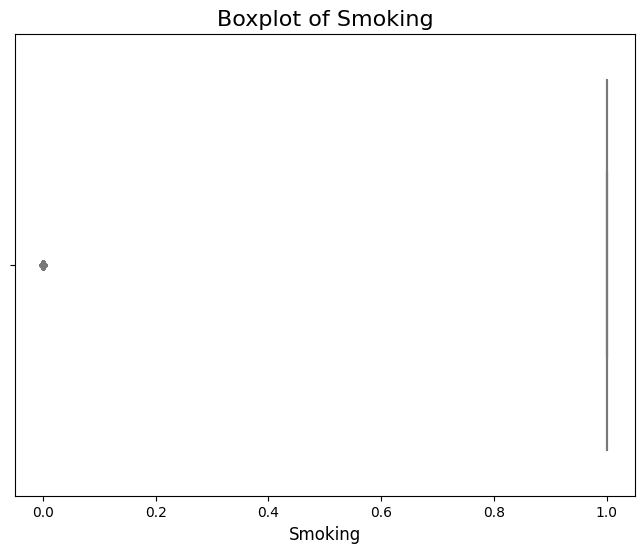

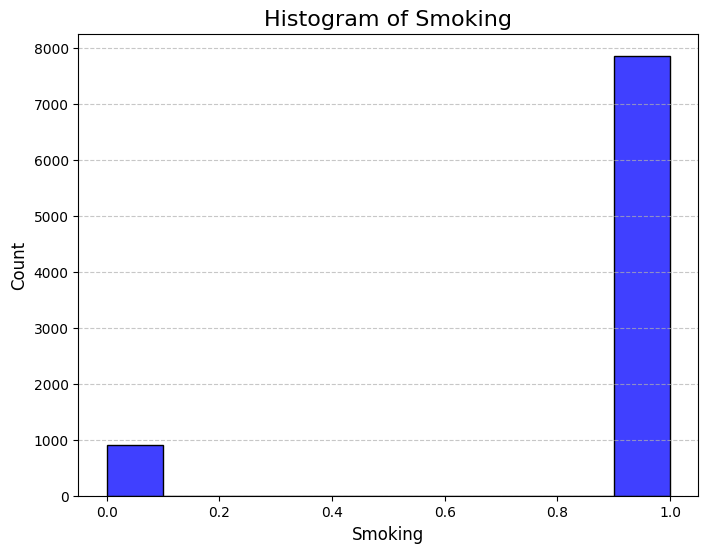

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Smoking', color='lightblue')
plt.title('Boxplot of Smoking', fontsize=16)
plt.xlabel('Smoking', fontsize=12)
plt.show()

# 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Smoking', bins=10, kde=False, color='blue')
plt.title('Histogram of Smoking', fontsize=16)
plt.xlabel('Smoking', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


그냥 흡연자가 더 많은 편향된 데이터이다.

흡연자 비율: 89.68389820837612 %
비흡연자 비율: 10.316101791623874 %


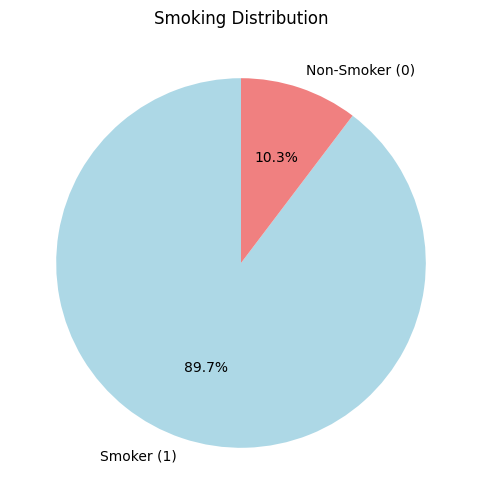

In [18]:
# 흡연/비흡연 비율 확인
smoking_counts = df['Smoking'].value_counts()
smoking_ratio = smoking_counts / len(df) * 100

print("흡연자 비율:", smoking_ratio[1], "%")
print("비흡연자 비율:", smoking_ratio[0], "%")

# 비율 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
smoking_counts.plot.pie(labels=["Smoker (1)", "Non-Smoker (0)"], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Smoking Distribution')
plt.ylabel('')
plt.show()


Smoking의 분포는 이상치가 아니므로 일단 데이터를 그대로 분석해보자.
- 데이터가 실제 조사 환경을 잘 반영했다는 가정하에!

### **TASK 2. 피쳐 엔지니어링**

[ 만들고자 하는 파생변수 ] 

- **BMI와 운동량의 상호작용 (Inactive Obesity)**
: BMI와 주간 운동 시간(Exercise Hours Per Week)을 결합해 비만이면서 운동량이 적은 사람의 위험도를 표현.

- **운동 부족 + 좌식 생활시간 (Inactive Lifestyle Index)**
: 주간 운동시간 부족과 좌식 생활시간을 합치면 '운동 부족'이라는 더욱 유의미한 결과를 도출할 수 있음


- **고혈압 여부 (Hypertension Flag)**
일반적으로 고혈압은 심장마비의 주요 요인 중 하나이다. -> 최고혈압 변수를 이용해서 고혈압 여부를 이진 변수로 

- **소득수준 별 심장병 리스크 분석**
: Income 컬럼을 기반으로 소득 수준을 카테고리화 -> 소득 수준에 따라 심장병 리스크(Heart Attack Risk)의 평균값을 계산. 소득 수준이 낮을수록 건강 관리 자원이 부족해 심장병 리스크가 높아질 가능성을 분석.-> 소득 수준을 기반으로 심장병 리스크를 조정한 파생변수를 생성.

In [24]:
# 1. BMI와 운동량의 상호작용: 비활동적 비만 - 값이 높을수록 비활동적 비만 정도 높음
df['Inactive_Obesity'] = df['BMI'] / (df['Exercise Hours Per Week'] + 1)  # 0으로 나누는 것 방지

print(df[['Inactive_Obesity']].head())

   Inactive_Obesity
0          6.200000
1          9.000000
2          9.333333
3          3.272727
4          3.142857


In [25]:
# 2. 운동 부족 + 좌식 생활시간 - 값이 높을수록 운동부족정도 높음
df['Inactive_Lifestyle_Index'] = df['Sedentary Hours Per Day'] - (df['Exercise Hours Per Week'] / 7)

print(df[['Inactive_Lifestyle_Index']].head())

   Inactive_Lifestyle_Index
0                  6.428571
1                  4.714286
2                  8.714286
3                  6.571429
4                  1.142857


In [26]:
# 3. 고혈압 여부 1/0
df['Hypertension_Flag'] = ((df['Systolic_BP'] > 140) | (df['Diastolic_BP'] > 90)).astype(int)

print(df[['Hypertension_Flag']].head())

   Hypertension_Flag
0                  1
1                  1
2                  1
3                  1
4                  0


In [27]:
#4. 소득수준별 심장병 리스크

# 소득 수준 분류 (Low, Middle, High)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

def categorize_income(income):
    if income <= Q1:
        return 'Low'
    elif income <= Q3:
        return 'Middle'
    else:
        return 'High'

df['Income_Level'] = df['Income'].apply(categorize_income)

# 소득 수준별 심장병 리스크 평균 계산
income_risk_avg = df.groupby('Income_Level')['Heart Attack Risk'].mean()
print("소득 수준별 심장병 리스크 평균:\n", income_risk_avg)

# 소득-심장병 상호작용 변수 생성
df['Income_Risk_Interaction'] = df['Income'] * df['Heart Attack Risk']

# 결과 확인
print(df[['Income', 'Income_Level', 'Heart Attack Risk', 'Income_Risk_Interaction']].head())

소득 수준별 심장병 리스크 평균:
 Income_Level
High      0.373346
Low       0.353263
Middle    0.353116
Name: Heart Attack Risk, dtype: float64
   Income Income_Level  Heart Attack Risk  Income_Risk_Interaction
0  261404         High                  0                        0
1  285768         High                  0                        0
2  235282         High                  0                        0
3  125640       Middle                  0                        0
4  160555       Middle                  0                        0


🔍 후에 추가적으로 고려할 사항

1. 소득 수준과 국가별 경제수준을 결합
국가별 GDP 데이터를 추가해서, 개인 소득을 국가 평균 소득과 비교하는 방식으로 상대적 소득 수준을 분석.


2. 소득 수준과 건강 변수 결합
소득 수준이 건강 관리 지표(운동 시간, 스트레스, 좌식 시간 등)에 미치는 영향을 분석.